### I have cleaned the data using R and now im looking to use pandas to create exploritory figures.

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [130]:
proteomics_ack = pd.read_csv("data/proteomics_ack.csv")

In [131]:
print("proteomics_ack shape is ", proteomics_ack.shape)
print()

print(proteomics_ack.head())
print()

print(proteomics_ack.describe())

proteomics_ack shape is  (2018, 102)

   Unnamed: 0  Index  Index in Detail  Sample2vSample1      Sample3vSample1  \
0           1      2                3         1.700848   1.7805019863310996   
1           2      3                4        -1.503863    1.306579795240185   
2           3      4                8         1.958863   2.2352086192147267   
3           4      5                9        -1.484604  -1.1893749153277526   
4           5      6               11         1.419223    1.519303918615512   

   Sample3vSample2  Max Abundance  Max % CV Gene Name Protein Name  ...  \
0        -1.043919   4.647579e+07  0.328817      Wdr1         WDR1  ...   
1         1.798046   3.058275e+07  0.804888      Wdr1         WDR1  ...   
2         1.044168   1.252594e+07  0.414742      Wdr1         WDR1  ...   
3         1.142216   6.066070e+07  0.208634      Wdr1         WDR1  ...   
4        -1.020821   2.846943e+06  0.600069      Wdr1         WDR1  ...   

  Run 1 Sample 2 : Sample 1...92 Run

In [132]:
proteomics_ack.head(3)

,Unnamed: 0,Index,Index in Detail,Sample2vSample1,Sample3vSample1,Sample3vSample2,Max Abundance,Max % CV,Gene Name,Protein Name,...,Run 1 Sample 2 : Sample 1...92,Run 1 Sample 3 : Sample 1...93,Run 1 Sample 3 : Sample 2...94,Run 2 Sample 2 : Sample 1...95,Run 2 Sample 3 : Sample 1...96,Run 2 Sample 3 : Sample 2...97,Sample 2 : Sample 1...98,Sample 3 : Sample 1...99,Sample 3 : Sample 2...100,Species
0,1,2,3,1.700848,1.7805019863310996,-1.043919,4.647579e+07,0.328817,Wdr1,WDR1,...,2.264360,2.842615,1.102947,1.064356,-1.176076,-1.227643,1.700848,1.780502,-1.043919,mouse
1,2,3,4,-1.503863,1.306579795240185,1.798046,3.058275e+07,0.804888,Wdr1,WDR1,...,1.121448,-1.032004,-1.317281,-1.314529,1.679024,2.250493,-1.503863,1.306580,1.798046,mouse
2,3,4,8,1.958863,2.2352086192147267,1.044168,1.252594e+07,0.414742,Wdr1,WDR1,...,3.076868,4.398618,1.256000,1.338647,1.186713,-1.106293,1.958863,2.235209,1.044168,mouse


In [133]:
proteomics_ack['First Gene Name'] = proteomics_ack['Gene Name'].str.split(';').str[0]
proteomics_ack['First Protein Name'] = proteomics_ack['Protein Name'].str.split(';').str[0]

### Plotting the frequency or distribution of the counts in detail or number of fragments.

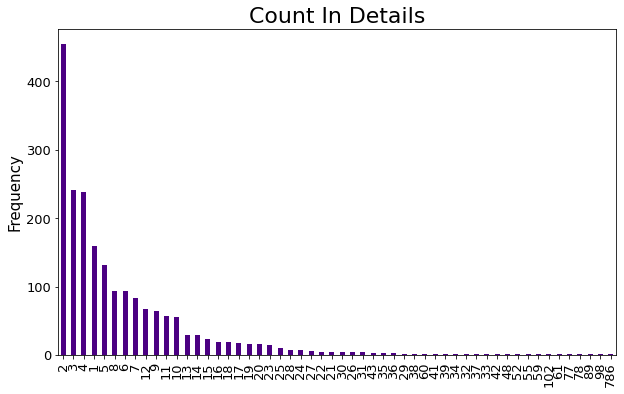

In [134]:
plt.rcParams["figure.figsize"] = [10, 6]

proteomics_ack = proteomics_ack.replace(np.nan,0)

ax = proteomics_ack['Count In Details'].value_counts().plot(kind='bar', color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Count In Details", fontsize=22)
ax.set_ylabel("Frequency", fontsize=15);
plt.show()

### Plotting the frequency or distribution of the number of sites for the first protein.

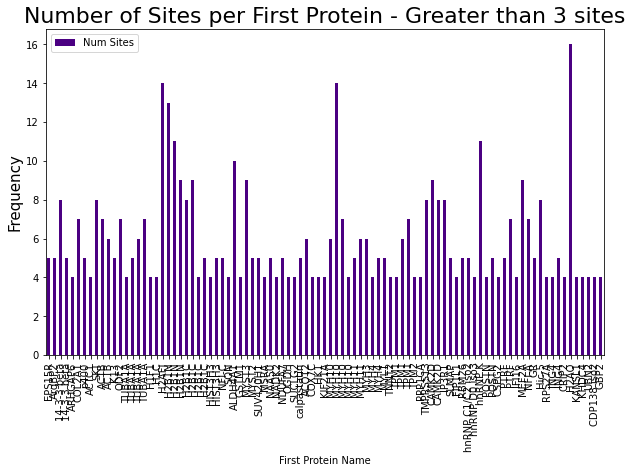

In [135]:
proteomics_ack['Num Sites'] = proteomics_ack['Site'].str.split(';').str.len()
df = proteomics_ack[['Num Sites', 'First Protein Name']].copy().drop_duplicates()

# Filtering out the protein with three or less sites
df = df[df['Num Sites'] > 3]
df = df.set_index('First Protein Name')


ax = df.plot(kind='bar', color="indigo", fontsize=10, linewidth= 3)
ax.set_alpha(0.8)
ax.set_title("Number of Sites per First Protein - Greater than 3 sites", fontsize=22)
ax.set_ylabel("Frequency", fontsize=15);
ax.set_xticklabels
plt.show()


# print(df)


### Plotting the frequency or distribution of the number of sites for the first gene.

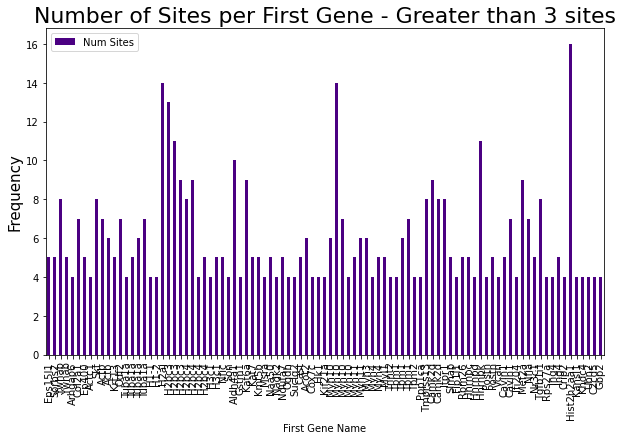

In [136]:
proteomics_ack['Num Sites'] = proteomics_ack['Site'].str.split(';').str.len()
df = proteomics_ack[['Num Sites', 'First Gene Name']].copy().drop_duplicates()

# Filtering out the protein with three or less sites
df = df[df['Num Sites'] > 3]
df = df.set_index('First Gene Name')


ax = df.plot(kind='bar', color="indigo", fontsize=10, linewidth= 3)
ax.set_alpha(0.8)
ax.set_title("Number of Sites per First Gene - Greater than 3 sites", fontsize=22)
ax.set_ylabel("Frequency", fontsize=15);
ax.set_xticklabels
plt.show()

### Calculating the avg peptide length

In [137]:
proteomics_ack['Peptide length'] = proteomics_ack['Peptide'].str.len()

print("Average peptide length: ", proteomics_ack['Peptide length'].mean())

Average peptide length:  14.220515361744301


## Attempting to re-create max abundance values.

first I am copying the normalized abundance values and the max abundance value for the corresponding rows.

In [138]:
normalized_abundance_values = proteomics_ack.iloc[:, 20:38].copy()
normalized_abundance_values["Max Abundance"] = proteomics_ack["Max Abundance"].copy()

col = normalized_abundance_values.pop("Max Abundance")
normalized_abundance_values.insert(0, col.name, col)
normalized_abundance_values

,Max Abundance,Sample 1 (CS34041),Sample 1 (CS34042),Sample 2 (CS34043),Sample 2 (CS34044),Sample 3 (CS34045),Sample 3 (CS34046),Sample 1 (CS34211),Sample 1 (CS34212),Sample 2 (CS34213),Sample 2 (CS34214),Sample 3 (CS34215),Sample 3 (CS34216),Sample 1...32,Sample 1...33,Sample 2...34,Sample 2...35,Sample 3...36,Sample 3...37
0,4.647579e+07,1.044713e+07,1.312373e+07,2.876922e+07,3.487944e+07,1.823685e+07,4.931119e+07,1.528954e+07,1.116307e+07,1.073744e+07,1.856547e+07,1.658582e+07,6.610281e+06,2.573666e+07,2.428680e+07,3.950665e+07,5.344492e+07,3.482267e+07,5.592147e+07
1,3.058275e+07,7.044625e+06,1.733187e+07,0.000000e+00,1.630005e+07,1.444702e+07,9.365714e+06,1.011793e+07,1.145375e+07,7.190881e+06,9.888376e+06,1.727375e+07,2.007902e+07,1.716255e+07,2.878563e+07,7.190881e+06,2.618843e+07,3.172077e+07,2.944474e+07
2,1.252594e+07,1.894028e+06,1.715533e+06,6.754850e+06,6.489529e+06,8.360957e+06,7.645302e+06,5.219387e+06,2.171743e+06,4.808471e+06,5.489040e+06,2.151823e+06,6.893800e+06,7.113414e+06,3.887276e+06,1.156332e+07,1.197857e+07,1.051278e+07,1.453910e+07
3,6.066070e+07,4.429493e+07,5.380521e+07,2.914059e+07,3.674407e+07,4.415202e+07,4.152711e+07,1.009585e+07,1.312541e+07,8.912965e+06,1.448032e+07,9.888094e+06,8.358006e+06,5.439077e+07,6.693063e+07,3.805356e+07,5.122439e+07,5.404011e+07,4.988512e+07
4,2.846943e+06,8.489552e+05,2.160304e+06,2.051791e+06,3.642096e+06,3.429188e+06,2.255253e+06,2.080991e+05,4.549635e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.057054e+06,2.615268e+06,2.051791e+06,3.642096e+06,3.429188e+06,2.255253e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,1.472011e+07,9.055129e+06,1.709410e+07,1.505351e+07,1.438670e+07,1.061919e+07,1.199673e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.055129e+06,1.709410e+07,1.505351e+07,1.438670e+07,1.061919e+07,1.199673e+07
2014,2.875408e+07,2.115316e+07,1.647785e+07,7.041440e+06,4.712536e+06,1.520599e+07,7.782367e+06,1.106976e+07,8.807380e+06,4.332926e+06,3.571706e+06,1.869403e+06,1.571808e+06,3.222292e+07,2.528523e+07,1.137437e+07,8.284242e+06,1.707539e+07,9.354175e+06
2015,1.162652e+08,5.477166e+07,3.648961e+07,5.971344e+07,5.839799e+07,4.181077e+07,3.480156e+07,4.723916e+07,4.397091e+07,5.990702e+07,5.451197e+07,4.775764e+07,4.411949e+07,1.020108e+08,8.046053e+07,1.196205e+08,1.129100e+08,8.956841e+07,7.892105e+07
2016,3.806944e+09,2.131227e+09,1.772022e+09,2.324833e+09,2.237565e+09,3.160813e+09,2.985111e+09,3.231405e+08,3.169413e+08,3.795540e+08,4.073252e+08,7.334600e+08,7.345031e+08,2.454368e+09,2.088963e+09,2.704387e+09,2.644890e+09,3.894273e+09,3.719614e+09


Next, I am going to attempt to re-create the max abundance values for

In [139]:
norm_max_abundance = normalized_abundance_values.iloc[:, 2:].max(axis = 1)
norm_max_abundance

0       5.592147e+07
1       3.172077e+07
2       1.453910e+07
3       6.693063e+07
4       3.642096e+06
            ...     
2013    1.709410e+07
2014    3.222292e+07
2015    1.196205e+08
2016    3.894273e+09
2017    7.389294e+07
Length: 2018, dtype: float64

Based on the results from above I am now attempting to re-create the max abundance using the average abundance values instead.

In [140]:
avg_abundance_values = proteomics_ack.iloc[:, 38:47].copy()
avg_abundance_values["Max Abundance"] = proteomics_ack["Max Abundance"].copy()

col = avg_abundance_values.pop("Max Abundance")
avg_abundance_values.insert(0, col.name, col)
avg_abundance_values

,Max Abundance,Run 1 Sample 1...38,Run 1 Sample 2...39,Run 1 Sample 3...40,Run 2 Sample 1...41,Run 2 Sample 2...42,Run 2 Sample 3...43,Sample 1...44,Sample 2...45,Sample 3...46
0,4.647579e+07,1.178543e+07,3.182433e+07,3.377402e+07,1.322630e+07,1.465146e+07,1.159805e+07,2.501173e+07,4.647579e+07,4.537207e+07
1,3.058275e+07,1.218825e+07,1.630005e+07,1.190637e+07,1.078584e+07,8.539628e+06,1.867639e+07,2.297409e+07,1.668966e+07,3.058275e+07
2,1.252594e+07,1.804780e+06,6.622190e+06,8.003130e+06,3.695565e+06,5.148756e+06,4.522812e+06,5.500345e+06,1.177095e+07,1.252594e+07
3,6.066070e+07,4.905007e+07,3.294233e+07,4.283956e+07,1.161063e+07,1.169664e+07,9.123050e+06,6.066070e+07,4.463898e+07,5.196261e+07
4,2.846943e+06,1.504630e+06,2.846943e+06,2.842220e+06,3.315313e+05,1.000000e+05,1.000000e+05,1.836161e+06,2.846943e+06,2.842220e+06
...,...,...,...,...,...,...,...,...,...,...
2013,1.472011e+07,1.307462e+07,1.472011e+07,1.130796e+07,1.000000e+05,1.000000e+05,1.000000e+05,1.307462e+07,1.472011e+07,1.130796e+07
2014,2.875408e+07,1.881551e+07,5.876988e+06,1.149418e+07,9.938570e+06,3.952316e+06,1.720606e+06,2.875408e+07,9.829304e+06,1.321478e+07
2015,1.162652e+08,4.563064e+07,5.905571e+07,3.830616e+07,4.560504e+07,5.720949e+07,4.593857e+07,9.123567e+07,1.162652e+08,8.424473e+07
2016,3.806944e+09,1.951625e+09,2.281199e+09,3.072962e+09,3.200409e+08,3.934396e+08,7.339816e+08,2.271665e+09,2.674638e+09,3.806944e+09


In [141]:
avg_max_abundance = avg_abundance_values.iloc[:, 2:].max(axis = 1)
avg_max_abundance

0       4.647579e+07
1       3.058275e+07
2       1.252594e+07
3       6.066070e+07
4       2.846943e+06
            ...     
2013    1.472011e+07
2014    2.875408e+07
2015    1.162652e+08
2016    3.806944e+09
2017    6.901662e+07
Length: 2018, dtype: float64

## Attempting to re-create max % CV or coefficient of variation

Beginning by isolating the values I am exaining for easier and more efficient interpretation

In [142]:
percent_cv_values = proteomics_ack.iloc[:, 47:56].copy()
percent_cv_values["Max % CV"] = proteomics_ack["Max % CV"].copy()

col = percent_cv_values.pop("Max % CV")
percent_cv_values.insert(0, col.name, col)
percent_cv_values

,Max % CV,Run 1 Sample 1...47,Run 1 Sample 2...48,Run 1 Sample 3...49,Run 2 Sample 1...50,Run 2 Sample 2...51,Run 2 Sample 3...52,Sample 1...53,Sample 2...54,Sample 3...55
0,0.328817,0.160592,0.135764,0.650585,0.220610,0.377796,0.608186,0.040989,0.212064,0.328817
1,0.804888,0.596819,0.000000,0.301773,0.087575,0.223361,0.106210,0.357740,0.804888,0.052624
2,0.414742,0.069934,0.028331,0.063231,0.583134,0.093466,0.741372,0.414742,0.024945,0.227291
3,0.208634,0.137100,0.163209,0.043326,0.184506,0.336568,0.118594,0.146174,0.208634,0.056541
4,0.600069,0.616274,0.394990,0.292059,0.526525,0.000000,0.000000,0.600069,0.394990,0.292059
...,...,...,...,...,...,...,...,...,...,...
2013,0.434767,0.434767,0.032031,0.086140,0.000000,0.000000,0.000000,0.434767,0.032031,0.086140
2014,0.413153,0.175703,0.280209,0.456691,0.160963,0.136190,0.122301,0.170608,0.222299,0.413153
2015,0.167022,0.283304,0.015751,0.129385,0.050674,0.066683,0.056000,0.167022,0.040812,0.089368
2016,0.113740,0.130146,0.027051,0.040430,0.013697,0.049912,0.001005,0.113740,0.015730,0.032441


In [143]:
max_cv = percent_cv_values.iloc[:, 7:].max(axis = 1)
print(max_cv)

""" avg_cv = percent_cv_values.iloc[:, [1, 4]].sum(axis = 1)
avg_cv """

0       0.328817
1       0.804888
2       0.414742
3       0.208634
4       0.600069
          ...   
2013    0.434767
2014    0.413153
2015    0.167022
2016    0.113740
2017    0.103813
Length: 2018, dtype: float64


' avg_cv = percent_cv_values.iloc[:, [1, 4]].sum(axis = 1)\navg_cv '

After looking closely at the values, the max % CV values come from the last three columns of %CV for all of the runs. I am currently nor sure where/how those values were produced.

## Attempting to re-create the Normalized Fold Change values.

In [144]:
norm_FC_values = proteomics_ack.iloc[:, -14:-5].copy()
norm_FC_values

,Run 1 Sample 2 : Sample 1...92,Run 1 Sample 3 : Sample 1...93,Run 1 Sample 3 : Sample 2...94,Run 2 Sample 2 : Sample 1...95,Run 2 Sample 3 : Sample 1...96,Run 2 Sample 3 : Sample 2...97,Sample 2 : Sample 1...98,Sample 3 : Sample 1...99,Sample 3 : Sample 2...100
0,2.264360,2.842615,1.102947,1.064356,-1.176076,-1.227643,1.700848,1.780502,-1.043919
1,1.121448,-1.032004,-1.317281,-1.314529,1.679024,2.250493,-1.503863,1.306580,1.798046
2,3.076868,4.398618,1.256000,1.338647,1.186713,-1.106293,1.958863,2.235209,1.044168
3,-1.775635,-1.154287,1.351519,-1.033118,-1.312495,-1.245941,-1.484604,-1.189375,1.142216
4,1.586649,1.873738,1.037553,-3.450482,-3.419058,0.000000,1.419223,1.519304,-1.020821
...,...,...,...,...,...,...,...,...,...
2013,-1.059221,-1.165639,-1.252551,0.000000,0.000000,0.000000,1.030539,-1.178005,-1.326647
2014,-3.817944,-1.650279,2.032611,-2.617143,-5.956959,-2.232269,-3.195907,-2.216878,1.319194
2015,1.085268,-1.200901,-1.483413,1.205314,-1.023805,-1.210227,1.166454,-1.103378,-1.406486
2016,-1.020238,1.561858,1.399991,1.181183,2.223810,1.919689,1.077713,1.644863,1.396635


In [145]:
s2vs1 = pd.DataFrame()
s2vs1['avg FC val'] = norm_FC_values.iloc[: , [0, 3]].mean(axis=1)
s2vs1["FC val"] = norm_FC_values.iloc[: , 6]
s2vs1

,avg FC val,FC val
0,1.664358,1.700848
1,-0.096540,-1.503863
2,2.207758,1.958863
3,-1.404376,-1.484604
4,-0.931917,1.419223
...,...,...
2013,-0.529610,1.030539
2014,-3.217544,-3.195907
2015,1.145291,1.166454
2016,0.080473,1.077713


Looks like there is some sort of correction or factor that is involved with calculating the final normalized FC values. I am going to attempt to use the raw FC values to see if I can get a more accurate estimate.

In [146]:
raw_FC_values = proteomics_ack.iloc[:, -23:-14].copy()
raw_FC_values

,Run 1 Sample 2 : Sample 1...83,Run 1 Sample 3 : Sample 1...84,Run 1 Sample 3 : Sample 2...85,Run 2 Sample 2 : Sample 1...86,Run 2 Sample 3 : Sample 1...87,Run 2 Sample 3 : Sample 2...88,Sample 2 : Sample 1...89,Sample 3 : Sample 1...90,Sample 3 : Sample 2...91
0,2.700311,2.865744,1.061264,1.107751,-1.140390,-1.263269,1.858159,1.814031,-1.024326
1,1.337358,-1.023675,-1.369020,-1.263034,1.731565,2.187026,-1.376547,1.331185,1.832438
2,3.669250,4.434406,1.208532,1.393226,1.223849,-1.138397,2.140038,2.277301,1.064141
3,-1.488968,-1.144971,1.300441,1.007408,-1.272670,-1.282098,-1.358918,-1.167391,1.164064
4,1.892122,1.888983,-1.001662,-3.315313,-3.315313,0.000000,1.550487,1.547915,-1.001662
...,...,...,...,...,...,...,...,...,...
2013,1.125854,-1.156231,-1.301748,0.000000,0.000000,0.000000,1.125854,-1.156231,-1.301748
2014,-3.201556,-1.636960,1.955794,-2.514619,-5.776205,-2.297049,-2.925342,-2.175903,1.344427
2015,1.294212,-1.191209,-1.541676,1.254456,1.007313,-1.245348,1.274339,-1.082984,-1.380089
2016,1.168872,1.574566,1.347082,1.229342,2.293399,1.865551,1.177391,1.675838,1.423349


In [147]:
raw_s2vs1 = pd.DataFrame()
raw_s2vs1['avg raw FC val'] = raw_FC_values.iloc[: , [0, 3]].mean(axis=1)
raw_s2vs1["raw FC val"] = raw_FC_values.iloc[: , 6]
raw_s2vs1

,avg raw FC val,raw FC val
0,1.904031,1.858159
1,0.037162,-1.376547
2,2.531238,2.140038
3,-0.240780,-1.358918
4,-0.711595,1.550487
...,...,...
2013,0.562927,1.125854
2014,-2.858088,-2.925342
2015,1.274334,1.274339
2016,1.199107,1.177391


There appears to still be some sort of correction or normalization occuring.

*** SIDE NOTE : Normalized Log 2 Ratios are calculated by subtracting the median Log2 ratio for each comparison. ***

### Continue with exploring how the fold change is calculated.

In [148]:
# print(norm_FC_values.iloc[:, 0].median())

median1 = norm_FC_values.iloc[:,0].median()
median2 = norm_FC_values.iloc[:,3].median()
print('Median of Run 1 Sample 2 : Sample 1 - norm FC : ', median1) 
print('Median of Run 2 Sample 2 : Sample 1 - norm FC : ', median2) 

df = pd.DataFrame()

df['original FC val run 1'] = norm_FC_values.iloc[: , 0]
df['original FC val run 2'] = norm_FC_values.iloc[: , 3]
# df['subtract FC val'] = norm_FC_values.iloc[: , 0].subtract(median, axis=0)
df["FC val"] = norm_FC_values.iloc[: , 6]
df

Median of Run 1 Sample 2 : Sample 1 - norm FC :  -1.01917034563734
Median of Run 2 Sample 2 : Sample 1 - norm FC :  0.0


,original FC val run 1,original FC val run 2,FC val
0,2.264360,1.064356,1.700848
1,1.121448,-1.314529,-1.503863
2,3.076868,1.338647,1.958863
3,-1.775635,-1.033118,-1.484604
4,1.586649,-3.450482,1.419223
...,...,...,...
2013,-1.059221,0.000000,1.030539
2014,-3.817944,-2.617143,-3.195907
2015,1.085268,1.205314,1.166454
2016,-1.020238,1.181183,1.077713
